## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../../ssd_data/combined_by_diskmodel/combined_MB1.csv',index_col=False)

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')
del(data['index'])
data

disk_id        ds model  n_1  r_1    n_5  r_5   n_9      r_9  n_12  \
0          10005  20190101   MB1  NaN  NaN  100.0  0.0  99.0   4600.0  99.0   
25641      39138  20190101   MB1  NaN  NaN  100.0  0.0  97.0  13256.0  99.0   
25642       3918  20190101   MB1  NaN  NaN  100.0  0.0  97.0  13305.0  99.0   
25643      39187  20190101   MB1  NaN  NaN  100.0  0.0  97.0  12934.0  99.0   
25644      39189  20190101   MB1  NaN  NaN  100.0  0.0  97.0  12934.0  99.0   
...          ...       ...   ...  ...  ...    ...  ...   ...      ...   ...   
7106047    27627  20190630   MB1  NaN  NaN  100.0  0.0  96.0  17027.0  99.0   
7106048    27631  20190630   MB1  NaN  NaN  100.0  0.0  96.0  17027.0  99.0   
7106049    27676  20190630   MB1  NaN  NaN  100.0  0.0  96.0  18069.0  99.0   
7106042    27586  20190630   MB1  NaN  NaN  100.0  0.0  98.0   8476.0  99.0   
7132652     9975  20190630   MB1  NaN  NaN  100.0  0.0  96.0  17397.0  99.0   

         ...  n_233  n_241         r_241  n_242         r_242  r_244  n_175  \
0        ...    NaN   99.0  2.189215e+09   99.0  2.041073e+09    0.0    NaN   
25641    ...    NaN   99.0  4.680026e+11   99.0  3.996304e+11    0.0    NaN   
25642    ...    NaN   99.0  9.327556e+10   99.0  5.956923e+10    0.0    NaN   
25643    ...    NaN   99.0  6.332917e+11   99.0  3.855869e+11    0.0    NaN   
25644    ...    NaN   99.0  6.095518e+11   99.0  3.592685e+11    0.0    NaN   
...      ...    ...    ...           ...    ...           ...    ...    ...   
7106047  ...    NaN   99.0  1.548638e+11   99.0  5.259749e+10    0.0    NaN   
7106048  ...    NaN   99.0  1.032149e+10   99.0  4.736847e+09    0.0    NaN   
7106049  ...    NaN   99.0  6.187498e+11   99.0  1.053691e+12    0.0    NaN   
7106042  ...    NaN   99.0  4.016917e+11   99.0  2.337927e+11    0.0    NaN   
7132652  ...    NaN   99.0  7.175013e+09   99.0  3.882591e+09    0.0    NaN   

         r_175  n_232  label  
0          NaN    NaN      0  
25641      NaN    NaN      0  
25642      NaN    NaN      0  
25643      NaN    NaN      0  
25644      NaN    NaN      0  
...        ...    ...    ...  
7106047    NaN    NaN      0  
7106048    NaN    NaN      0  
7106049    NaN    NaN      0  
7106042    NaN    NaN      0  
7132652    NaN    NaN      0  

[7132653 rows x 59 columns]

In [2]:
# null값이 있는 열을 제거하는 코드
def remove_null_columns(df):
    # null인 컬럼을 확인하고, 모든 값이 null인 컬럼을 찾습니다.
    null_columns = df.columns[df.isnull().all()]
    
    # 모든 값이 null인 컬럼을 DataFrame에서 제거합니다.
    df = df.drop(null_columns, axis=1)
    return df

data = remove_null_columns(data)
data

disk_id        ds model    n_5  r_5   n_9      r_9  n_12  r_12  \
0          10005  20190101   MB1  100.0  0.0  99.0   4600.0  99.0  36.0   
25641      39138  20190101   MB1  100.0  0.0  97.0  13256.0  99.0  16.0   
25642       3918  20190101   MB1  100.0  0.0  97.0  13305.0  99.0  17.0   
25643      39187  20190101   MB1  100.0  0.0  97.0  12934.0  99.0  18.0   
25644      39189  20190101   MB1  100.0  0.0  97.0  12934.0  99.0  18.0   
...          ...       ...   ...    ...  ...   ...      ...   ...   ...   
7106047    27627  20190630   MB1  100.0  0.0  96.0  17027.0  99.0  16.0   
7106048    27631  20190630   MB1  100.0  0.0  96.0  17027.0  99.0  16.0   
7106049    27676  20190630   MB1  100.0  0.0  96.0  18069.0  99.0  25.0   
7106042    27586  20190630   MB1  100.0  0.0  98.0   8476.0  99.0  27.0   
7132652     9975  20190630   MB1  100.0  0.0  96.0  17397.0  99.0  22.0   

         n_177  ...  r_195  r_197  n_199  r_199  n_241         r_241  n_242  \
0         99.0  ...    0.0    0.0  100.0    0.0   99.0  2.189215e+09   99.0   
25641     98.0  ...    0.0    0.0  100.0    0.0   99.0  4.680026e+11   99.0   
25642     99.0  ...    0.0    0.0  100.0    0.0   99.0  9.327556e+10   99.0   
25643     96.0  ...    0.0    0.0  100.0    0.0   99.0  6.332917e+11   99.0   
25644     96.0  ...    0.0    0.0  100.0    0.0   99.0  6.095518e+11   99.0   
...        ...  ...    ...    ...    ...    ...    ...           ...    ...   
7106047   99.0  ...    0.0    0.0  100.0    0.0   99.0  1.548638e+11   99.0   
7106048   99.0  ...    0.0    0.0  100.0    0.0   99.0  1.032149e+10   99.0   
7106049   96.0  ...    0.0    0.0   99.0    6.0   99.0  6.187498e+11   99.0   
7106042   98.0  ...    0.0    0.0  100.0    0.0   99.0  4.016917e+11   99.0   
7132652   99.0  ...    0.0    0.0  100.0    0.0   99.0  7.175013e+09   99.0   

                r_242  r_244  label  
0        2.041073e+09    0.0      0  
25641    3.996304e+11    0.0      0  
25642    5.956923e+10    0.0      0  
25643    3.855869e+11    0.0      0  
25644    3.592685e+11    0.0      0  
...               ...    ...    ...  
7106047  5.259749e+10    0.0      0  
7106048  4.736847e+09    0.0      0  
7106049  1.053691e+12    0.0      0  
7106042  2.337927e+11    0.0      0  
7132652  3.882591e+09    0.0      0  

[7132653 rows x 38 columns]

In [3]:
def remove_single_value_columns(df):
    single_value_cols = []
    for col in df.columns:
        unique_values = df[col].nunique()
        if unique_values == 1:
            single_value_cols.append(col)
    print(single_value_cols)
    df_filtered = df.drop(single_value_cols, axis=1)
    return df_filtered

filtered_data = remove_single_value_columns(data)
filtered_data

['model', 'r_197', 'r_244']


disk_id        ds    n_5  r_5   n_9      r_9  n_12  r_12  n_177  \
0          10005  20190101  100.0  0.0  99.0   4600.0  99.0  36.0   99.0   
25641      39138  20190101  100.0  0.0  97.0  13256.0  99.0  16.0   98.0   
25642       3918  20190101  100.0  0.0  97.0  13305.0  99.0  17.0   99.0   
25643      39187  20190101  100.0  0.0  97.0  12934.0  99.0  18.0   96.0   
25644      39189  20190101  100.0  0.0  97.0  12934.0  99.0  18.0   96.0   
...          ...       ...    ...  ...   ...      ...   ...   ...    ...   
7106047    27627  20190630  100.0  0.0  96.0  17027.0  99.0  16.0   99.0   
7106048    27631  20190630  100.0  0.0  96.0  17027.0  99.0  16.0   99.0   
7106049    27676  20190630  100.0  0.0  96.0  18069.0  99.0  25.0   96.0   
7106042    27586  20190630  100.0  0.0  98.0   8476.0  99.0  27.0   98.0   
7132652     9975  20190630  100.0  0.0  96.0  17397.0  99.0  22.0   99.0   

         r_177  ...  r_194  n_195  r_195  n_199  r_199  n_241         r_241  \
0          5.0  ...   27.0  200.0    0.0  100.0    0.0   99.0  2.189215e+09   
25641    143.0  ...   30.0  200.0    0.0  100.0    0.0   99.0  4.680026e+11   
25642     71.0  ...   31.0  200.0    0.0  100.0    0.0   99.0  9.327556e+10   
25643    244.0  ...   31.0  200.0    0.0  100.0    0.0   99.0  6.332917e+11   
25644    237.0  ...   30.0  200.0    0.0  100.0    0.0   99.0  6.095518e+11   
...        ...  ...    ...    ...    ...    ...    ...    ...           ...   
7106047   71.0  ...   29.0  200.0    0.0  100.0    0.0   99.0  1.548638e+11   
7106048   24.0  ...   29.0  200.0    0.0  100.0    0.0   99.0  1.032149e+10   
7106049  235.0  ...   31.0  200.0    0.0   99.0    6.0   99.0  6.187498e+11   
7106042  121.0  ...   33.0  200.0    0.0  100.0    0.0   99.0  4.016917e+11   
7132652   25.0  ...   25.0  200.0    0.0  100.0    0.0   99.0  7.175013e+09   

         n_242         r_242  label  
0         99.0  2.041073e+09      0  
25641     99.0  3.996304e+11      0  
25642     99.0  5.956923e+10      0  
25643     99.0  3.855869e+11      0  
25644     99.0  3.592685e+11      0  
...        ...           ...    ...  
7106047   99.0  5.259749e+10      0  
7106048   99.0  4.736847e+09      0  
7106049   99.0  1.053691e+12      0  
7106042   99.0  2.337927e+11      0  
7132652   99.0  3.882591e+09      0  

[7132653 rows x 35 columns]

NaN갑과 특정 숫자 하나만 가지는 feature가 존재하는데, 제거하지 않고 일단 남겨놓고 진행

## EDA

In [4]:
print(data.shape)
nan_stats = data.isnull().sum().sort_values(ascending = False)/data.shape[0]
nan_stats

(7132653, 38)


r_195      0.000069
n_195      0.000069
n_5        0.000068
r_5        0.000068
r_194      0.000067
n_194      0.000067
r_241      0.000067
r_244      0.000067
n_241      0.000067
r_197      0.000067
r_199      0.000067
n_199      0.000067
n_242      0.000066
r_242      0.000066
r_184      0.000066
n_184      0.000066
n_183      0.000066
r_183      0.000066
n_9        0.000066
r_9        0.000066
n_182      0.000065
r_182      0.000065
n_181      0.000065
r_181      0.000065
r_177      0.000065
n_177      0.000065
r_12       0.000065
n_12       0.000065
r_187      0.000064
n_190      0.000064
r_190      0.000064
n_187      0.000064
n_180      0.000064
r_180      0.000064
disk_id    0.000000
ds         0.000000
model      0.000000
label      0.000000
dtype: float64

In [5]:
features_data = data.drop(columns=['disk_id','ds','model'])
features_info=features_data.describe()

In [6]:
features_info.iloc[:,:14]

n_5           r_5           n_9           r_9          n_12  \
count  7.132166e+06  7.132166e+06  7.132184e+06  7.132184e+06  7.132190e+06   
mean   9.998179e+01  3.394169e-01  9.695034e+01  1.283869e+04  9.899991e+01   
std    3.932757e-01  2.433868e+01  9.644812e-01  5.571191e+03  9.479802e-03   
min    5.000000e+01  0.000000e+00  1.000000e+00  0.000000e+00  9.400000e+01   
25%    1.000000e+02  0.000000e+00  9.600000e+01  1.132600e+04  9.900000e+01   
50%    1.000000e+02  0.000000e+00  9.700000e+01  1.423800e+04  9.900000e+01   
75%    1.000000e+02  0.000000e+00  9.700000e+01  1.593900e+04  9.900000e+01   
max    1.000000e+02  3.236000e+03  1.000000e+02  1.803713e+06  9.900000e+01   

               r_12         n_177         r_177         n_180         r_180  \
count  7.132190e+06  7.132190e+06  7.132190e+06  7.132196e+06  7.132196e+06   
mean   2.172018e+01  9.762329e+01  1.341035e+02  9.998179e+01  6.519709e+03   
std    2.056869e+01  1.899110e+00  1.439278e+02  3.932750e-01  7.145670e+01   
min    3.000000e+00  4.900000e+01  0.000000e+00  5.000000e+01  3.257000e+03   
25%    1.600000e+01  9.700000e+01  2.100000e+01  1.000000e+02  6.501000e+03   
50%    1.900000e+01  9.800000e+01  9.700000e+01  1.000000e+02  6.526000e+03   
75%    2.300000e+01  9.900000e+01  2.050000e+02  1.000000e+02  6.547000e+03   
max    5.499000e+03  1.000000e+02  3.758000e+03  1.000000e+02  6.616000e+03   

              n_181         r_181         n_182         r_182  
count  7.132187e+06  7.132187e+06  7.132186e+06  7.132186e+06  
mean   9.999989e+01  1.339000e-04  9.999960e+01  1.973070e-02  
std    1.043700e-02  1.355716e-02  6.493784e-02  4.049550e+00  
min    9.900000e+01  0.000000e+00  8.200000e+01  0.000000e+00  
25%    1.000000e+02  0.000000e+00  1.000000e+02  0.000000e+00  
50%    1.000000e+02  0.000000e+00  1.000000e+02  0.000000e+00  
75%    1.000000e+02  0.000000e+00  1.000000e+02  0.000000e+00  
max    1.000000e+02  2.000000e+00  1.000000e+02  1.163000e+03

In [7]:
features_info.iloc[:,14:28]

n_183         r_183         n_184         r_184         n_187  \
count  7.132184e+06  7.132184e+06  7.132181e+06  7.132181e+06  7.132193e+06   
mean   9.998179e+01  3.394164e-01  9.999994e+01  8.104113e-05  9.999766e+01   
std    3.932754e-01  2.433865e+01  7.469960e-03  1.146778e-02  1.132317e-01   
min    5.000000e+01  0.000000e+00  9.900000e+01  0.000000e+00  7.700000e+01   
25%    1.000000e+02  0.000000e+00  1.000000e+02  0.000000e+00  1.000000e+02   
50%    1.000000e+02  0.000000e+00  1.000000e+02  0.000000e+00  1.000000e+02   
75%    1.000000e+02  0.000000e+00  1.000000e+02  0.000000e+00  1.000000e+02   
max    1.000000e+02  3.236000e+03  1.000000e+02  2.000000e+00  1.000000e+02   

              r_187         n_190         r_190         n_194         r_194  \
count  7.132193e+06  7.132193e+06  7.132193e+06  7.132173e+06  7.132173e+06   
mean   4.971063e+00  7.069541e+01  2.930451e+01  7.069541e+01  2.930451e+01   
std    1.044429e+03  2.503851e+00  2.503849e+00  2.503846e+00  2.503844e+00   
min    0.000000e+00  4.800000e+01  1.700000e+01  4.800000e+01  1.700000e+01   
25%    0.000000e+00  6.900000e+01  2.800000e+01  6.900000e+01  2.800000e+01   
50%    0.000000e+00  7.100000e+01  2.900000e+01  7.100000e+01  2.900000e+01   
75%    0.000000e+00  7.200000e+01  3.100000e+01  7.200000e+01  3.100000e+01   
max    2.296240e+05  8.300000e+01  5.200000e+01  8.300000e+01  5.200000e+01   

              n_195         r_195      r_197         n_199  
count  7.132160e+06  7.132160e+06  7132175.0  7.132176e+06  
mean   1.999940e+02  4.971086e+00        0.0  9.988353e+01  
std    9.136163e-01  1.044431e+03        0.0  1.210159e+00  
min    1.000000e+00  0.000000e+00        0.0  1.000000e+00  
25%    2.000000e+02  0.000000e+00        0.0  1.000000e+02  
50%    2.000000e+02  0.000000e+00        0.0  1.000000e+02  
75%    2.000000e+02  0.000000e+00        0.0  1.000000e+02  
max    2.000000e+02  2.296240e+05        0.0  1.000000e+02

In [8]:
features_info.iloc[:,28:]

r_199         n_241         r_241         n_242         r_242  \
count  7.132176e+06  7.132174e+06  7.132174e+06  7.132180e+06  7.132180e+06   
mean   3.365485e+01  9.899933e+01  3.388040e+11  9.899630e+01  2.957142e+11   
std    1.196357e+03  6.582141e-02  3.875881e+11  8.465221e-02  4.363011e+11   
min    0.000000e+00  9.600000e+01  0.000000e+00  9.400000e+01  7.000000e+00   
25%    0.000000e+00  9.900000e+01  2.757143e+10  9.900000e+01  1.553617e+10   
50%    0.000000e+00  9.900000e+01  2.363442e+11  9.900000e+01  1.860793e+11   
75%    0.000000e+00  9.900000e+01  5.302328e+11  9.900000e+01  4.260561e+11   
max    1.111500e+05  1.000000e+02  8.929888e+12  9.900000e+01  1.697260e+13   

           r_244         label  
count  7132174.0  7.132653e+06  
mean         0.0  4.262089e-05  
std          0.0  6.528329e-03  
min          0.0  0.000000e+00  
25%          0.0  0.000000e+00  
50%          0.0  0.000000e+00  
75%          0.0  0.000000e+00  
max          0.0  1.000000e+00

<AxesSubplot:>

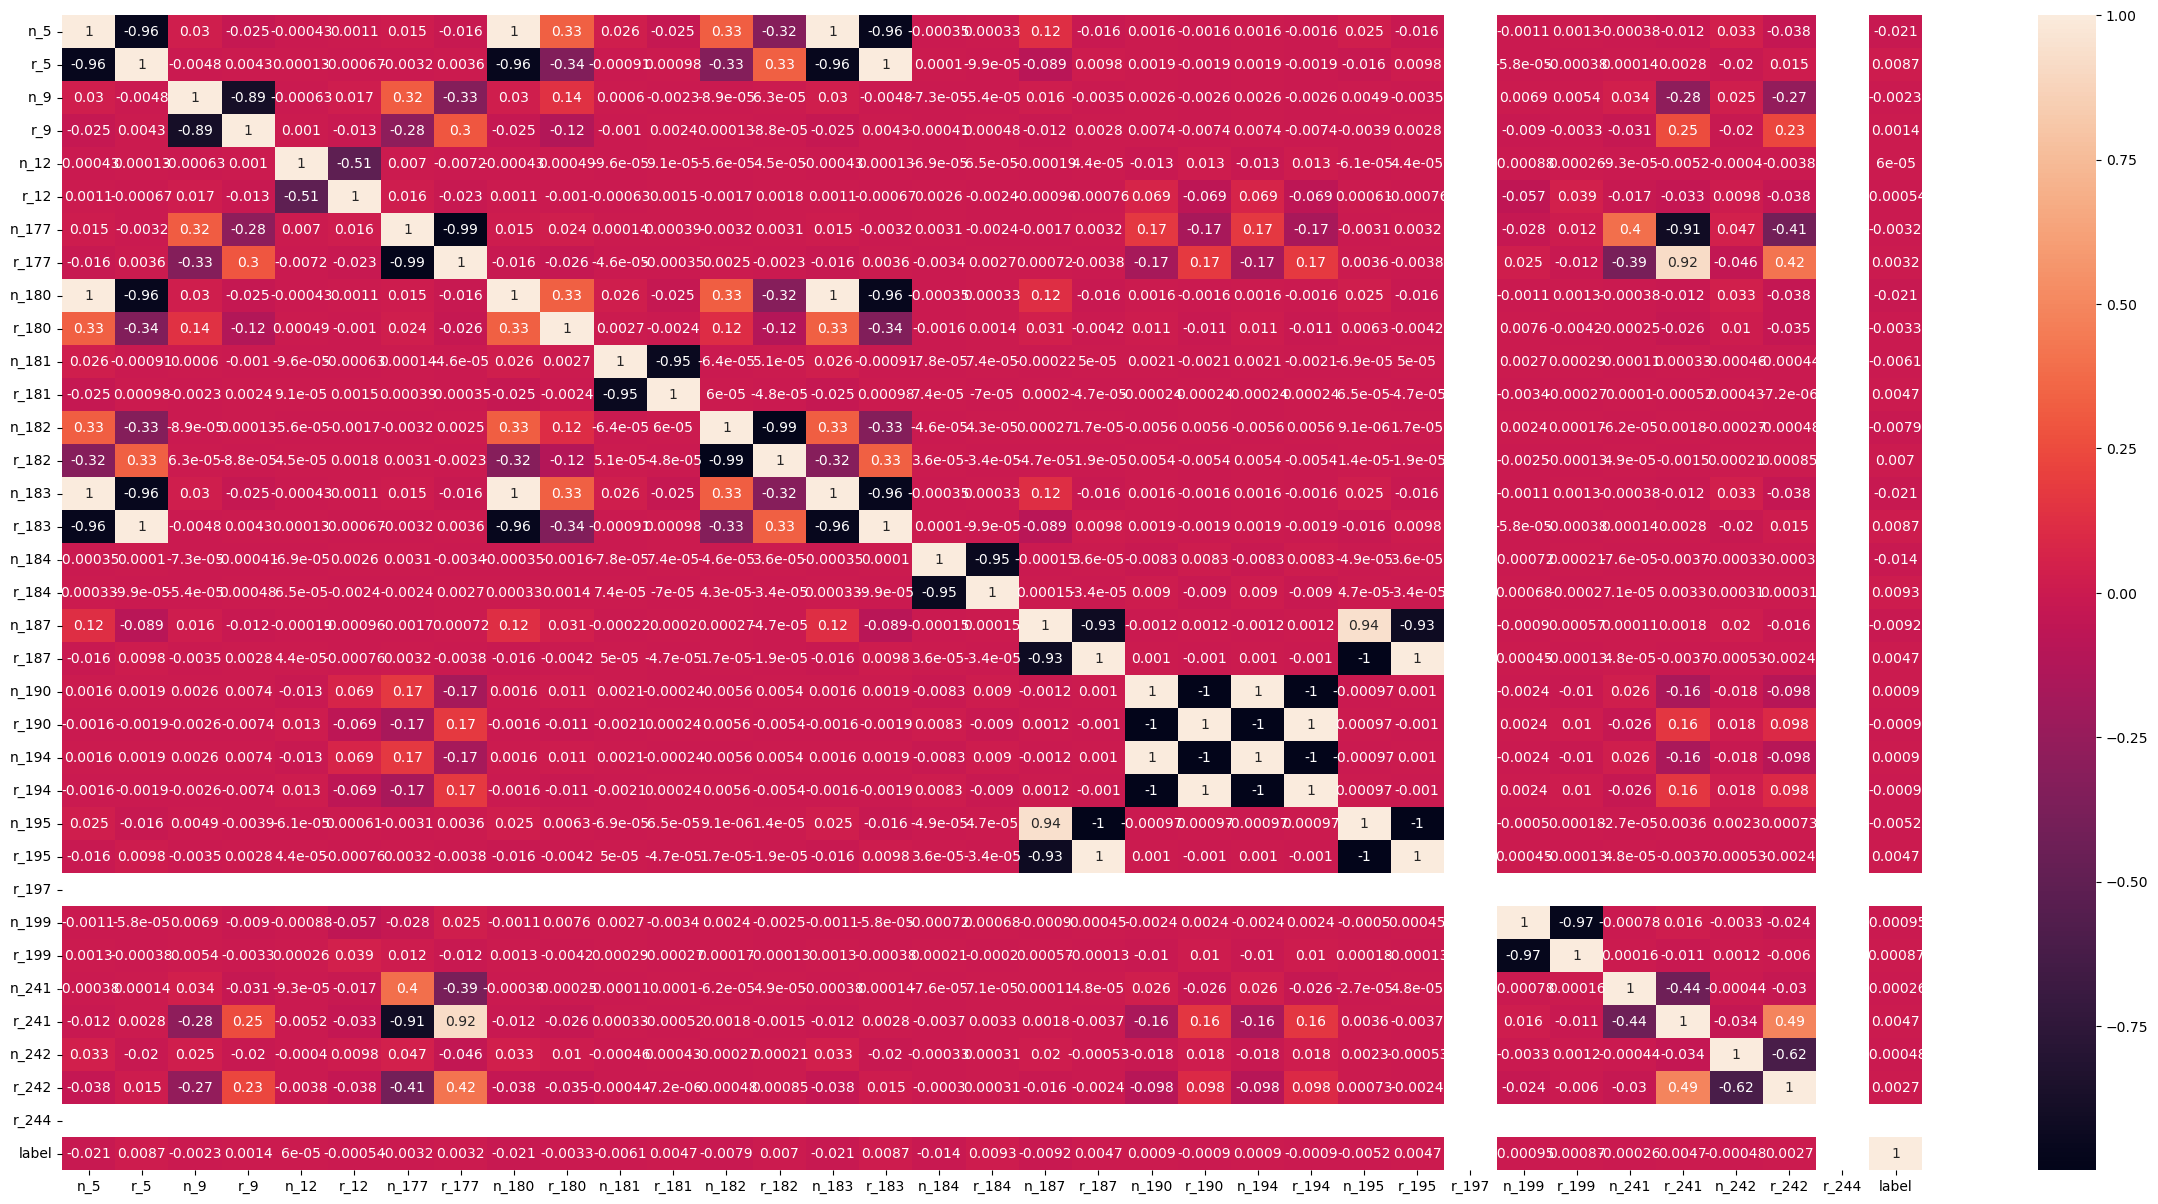

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt # seaborn figure 크기 조절을 위해서
corr = features_data.corr()
plt.figure(figsize=(30, 15)) 
sns.heatmap(corr, annot=True)

In [10]:
# 상관계수의 절대값이 0.4 이상인 셀만 선택
corr_np = np.abs(corr.values)
mask = corr_np > 0.4

# 선택한 셀의 행렬에서 대각선을 제거(자기 자신과의 상관계수는 항상 1)
mask[np.triu_indices_from(mask, k=1)] = False

# 마스크 적용
high_corr = corr_np[mask]

# 해당하는 feature 쌍 print
high_corr_pairs = []
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] and i != j:  # 추가된 부분: i와 j가 같지 않을 때만 추가
            high_corr_pairs.append((corr.columns[i], corr.columns[j]))

print(high_corr_pairs)

[('r_5', 'n_5'), ('r_9', 'n_9'), ('r_12', 'n_12'), ('r_177', 'n_177'), ('n_180', 'n_5'), ('n_180', 'r_5'), ('r_181', 'n_181'), ('r_182', 'n_182'), ('n_183', 'n_5'), ('n_183', 'r_5'), ('n_183', 'n_180'), ('r_183', 'n_5'), ('r_183', 'r_5'), ('r_183', 'n_180'), ('r_183', 'n_183'), ('r_184', 'n_184'), ('r_187', 'n_187'), ('r_190', 'n_190'), ('n_194', 'n_190'), ('n_194', 'r_190'), ('r_194', 'n_190'), ('r_194', 'r_190'), ('r_194', 'n_194'), ('n_195', 'n_187'), ('n_195', 'r_187'), ('r_195', 'n_187'), ('r_195', 'r_187'), ('r_195', 'n_195'), ('r_199', 'n_199'), ('r_241', 'n_177'), ('r_241', 'r_177'), ('r_241', 'n_241'), ('r_242', 'n_177'), ('r_242', 'r_177'), ('r_242', 'r_241'), ('r_242', 'n_242')]


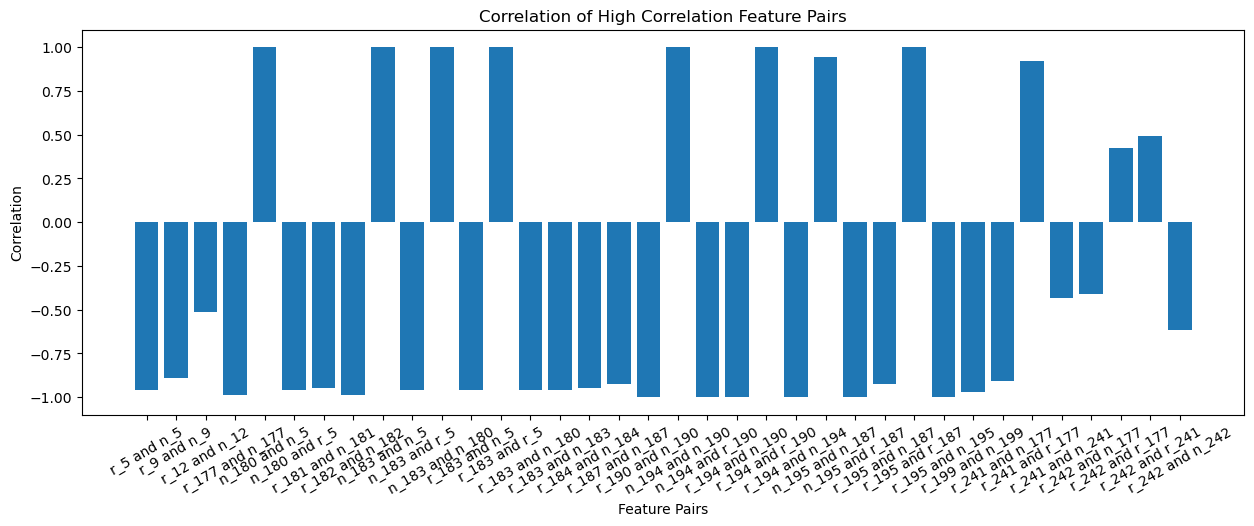

In [11]:
import matplotlib.pyplot as plt

# 상관계수 값 가져오기
high_corr_values = [corr.loc[pair] for pair in high_corr_pairs]

# 특성 쌍 이름 가져오기
pair_names = [f"{pair[0]} and {pair[1]}" for pair in high_corr_pairs]

# bar plot 그리기
plt.figure(figsize=(15, 5))
plt.bar(pair_names, high_corr_values)
plt.xlabel('Feature Pairs')
plt.ylabel('Correlation')
plt.title('Correlation of High Correlation Feature Pairs')
plt.xticks(rotation=30)
plt.show()

## About healthy data

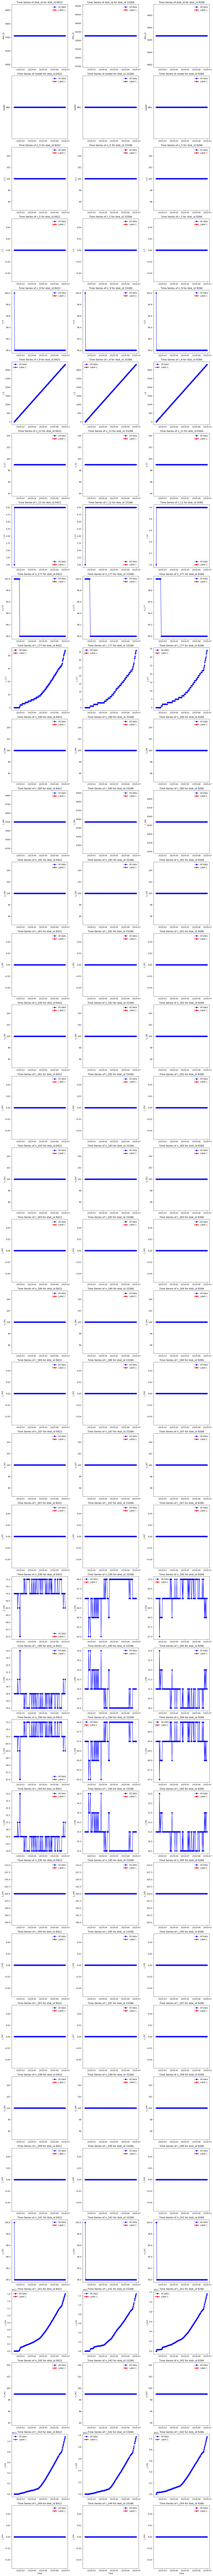

In [12]:
# 차이가 20일 이하인 disk_id 선택
disk_ids = data[data["label"]==0]['disk_id'].unique()

# 'r_9' 변수가 가장 작은 disk_id 선택
sorted_disk_ids = data[data['disk_id'].isin(disk_ids)].groupby('disk_id')['r_9'].min().sort_values()

# 가장 작은 'r_9' 값을 가진 3개의 disk_id 선택
selected_disk_ids = sorted_disk_ids.head(3).index

# 나머지 코드는 동일하게 실행
features = data.drop(['ds', 'label'], axis=1).columns
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]
    disk = disk.sort_values('ds')
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')
    disk.set_index('ds', inplace=True)
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')
        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

In [13]:
data[data['disk_id']==23124]

disk_id        ds model    n_5  r_5   n_9      r_9  n_12  r_12  \
21495      23124  20190101   MB1  100.0  0.0  97.0  11177.0  99.0  16.0   
42557      23124  20190102   MB1  100.0  0.0  97.0  11201.0  99.0  16.0   
82747      23124  20190103   MB1  100.0  0.0  97.0  11225.0  99.0  16.0   
146411     23124  20190104   MB1  100.0  0.0  97.0  11249.0  99.0  16.0   
181409     23124  20190105   MB1  100.0  0.0  97.0  11273.0  99.0  16.0   
...          ...       ...   ...    ...  ...   ...      ...   ...   ...   
6946252    23124  20190626   MB1  100.0  0.0  96.0  15401.0  99.0  16.0   
6984265    23124  20190627   MB1  100.0  0.0  96.0  15425.0  99.0  16.0   
7013285    23124  20190628   MB1  100.0  0.0  96.0  15449.0  99.0  16.0   
7058943    23124  20190629   MB1  100.0  0.0  96.0  15473.0  99.0  16.0   
7116861    23124  20190630   MB1  100.0  0.0  96.0  15497.0  99.0  16.0   

         n_177  ...  r_195  r_197  n_199  r_199  n_241         r_241  n_242  \
21495     98.0  ...    0.0    0.0  100.0    0.0   99.0  3.280868e+11   99.0   
42557     98.0  ...    0.0    0.0  100.0    0.0   99.0  3.290778e+11   99.0   
82747     98.0  ...    0.0    0.0  100.0    0.0   99.0  3.300711e+11   99.0   
146411    98.0  ...    0.0    0.0  100.0    0.0   99.0  3.310187e+11   99.0   
181409    98.0  ...    0.0    0.0  100.0    0.0   99.0  3.319645e+11   99.0   
...        ...  ...    ...    ...    ...    ...    ...           ...    ...   
6946252   97.0  ...    0.0    0.0  100.0    0.0   99.0  5.484683e+11   99.0   
6984265   97.0  ...    0.0    0.0  100.0    0.0   99.0  5.498897e+11   99.0   
7013285   97.0  ...    0.0    0.0  100.0    0.0   99.0  5.509851e+11   99.0   
7058943   97.0  ...    0.0    0.0  100.0    0.0   99.0  5.521206e+11   99.0   
7116861   97.0  ...    0.0    0.0  100.0    0.0   99.0  5.532943e+11   99.0   

                r_242  r_244  label  
21495    2.342879e+11    0.0      0  
42557    2.350134e+11    0.0      0  
82747    2.357533e+11    0.0      0  
146411   2.364346e+11    0.0      0  
181409   2.371319e+11    0.0      0  
...               ...    ...    ...  
6946252  3.799741e+11    0.0      0  
6984265  3.811922e+11    0.0      0  
7013285  3.820612e+11    0.0      0  
7058943  3.829445e+11    0.0      0  
7116861  3.838434e+11    0.0      0  

[180 rows x 38 columns]

데이터 값은 20190620에 처음 나타났는데, 이미 power on hours 값은 3000정도임을 발견.</br>
=> 이미 사용중이였는데, SMART log가 20190620부터 측정된거 같다..?

## About Failed data

- 처음 관측된 값이 2019년 1월 2일 이후에 존재하는 데이터를 "새로 사용하기 시작한 SSD"라고 가정하고,</br>
fail이 일어나기까지 "몇 일"이 걸렸는지를 분석하고자 함

In [14]:
# 각 disk_id의 첫 시점 계산
df_first_ds = pd.to_datetime(data.groupby('disk_id')['ds'].min(), format='%Y%m%d')

# 각 disk_id의 첫 시점이 20190103 이상인 disk_id만 선택
selected_disk_ids = df_first_ds[df_first_ds >= pd.to_datetime('20190101', format='%Y%m%d')].index

# 선택된 disk_id만 포함하는 데이터만 선택
data_selected = data[data['disk_id'].isin(selected_disk_ids)]

# label=1인 데이터만 필터링
df_label1 = data_selected[data_selected['label'] == 1]

# 각 disk_id에서 label=1이 처음으로 나타난 시점 계산
df_first_label1 = pd.to_datetime(df_label1.groupby('disk_id')['ds'].min(), format='%Y%m%d')

# label=1이 처음으로 나타난 시점이 각 disk_id의 첫 시점으로부터 얼마나 떨어져 있는지 계산
time_diff = (df_first_label1 - df_first_ds.loc[selected_disk_ids]).dt.days  # 이 경우, 결과는 '일' 단위입니다.

# 차이가 20일 이하인 데이터의 수 계산
count_less_than_20 = (time_diff <= 20).sum()

# 차이가 20일 초과인 데이터의 수 계산
count_more_than_20 = (time_diff > 20).sum()

print("The number of data with a difference of 20 days or less: ", count_less_than_20)
print("The number of data with a difference more than 20 days: ", count_more_than_20)

The number of data with a difference of 20 days or less:  45
The number of data with a difference more than 20 days:  259


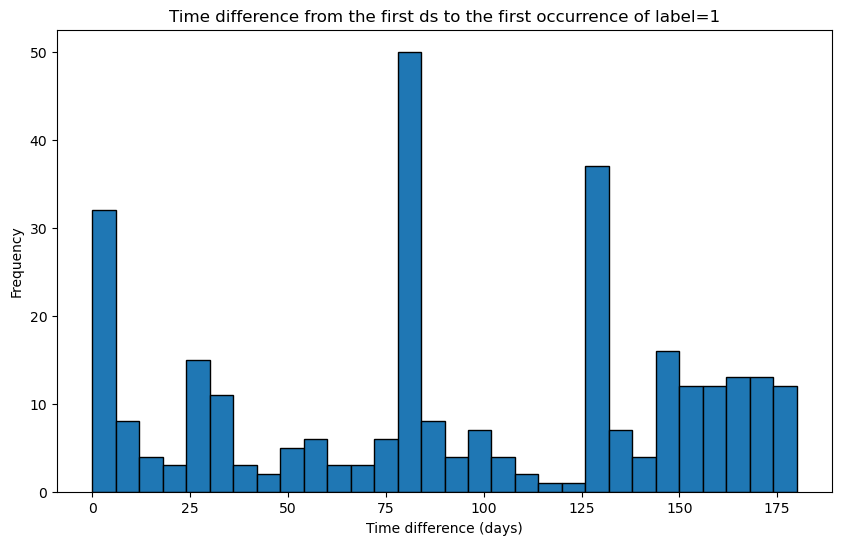

In [15]:
# 결과 히스토그램 그리기
plt.figure(figsize=(10, 6))
time_diff.hist(bins=30, edgecolor='k')
plt.title('Time difference from the first ds to the first occurrence of label=1')
plt.xlabel('Time difference (days)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

- 20일 

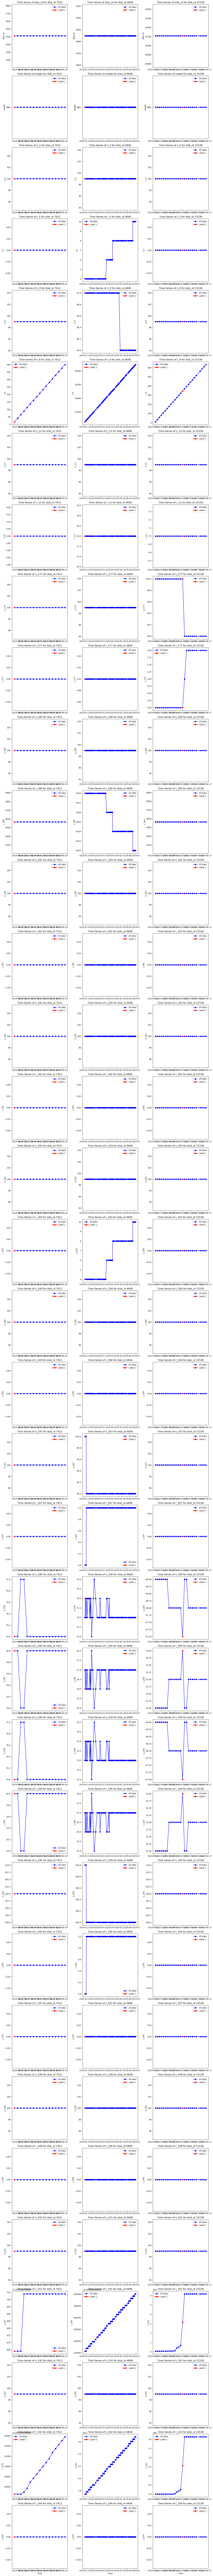

In [16]:
import numpy as np

# 차이가 20일 이하인 disk_id 선택
disk_ids = time_diff[time_diff <= 20].index

# disk_ids 중에서 임의로 3개 선택
selected_disk_ids = np.random.choice(disk_ids, size=3, replace=False)

# ds와 label 열을 제외한 모든 열에 대해
features = data.drop(['ds', 'label'], axis=1).columns

# 행의 수는 특징의 수, 열의 수는 disk_id의 수
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]

    # disk를 시간 순서대로 정렬
    disk = disk.sort_values('ds')

    # ds 열을 datetime으로 변환
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')

    # ds를 인덱스로 설정
    disk.set_index('ds', inplace=True)

    # label이 1인 데이터
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        # 모든 데이터 그리기
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')

        # label이 1인 데이터 빨간색으로 강조하여 그리기
        # 선의 굵기를 3으로 설정하고, 각 포인트에 대해 'o' 모양의 마커를 추가함
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')

        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

# x축 라벨 설정은 마지막 행에 대해서만 수행
for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

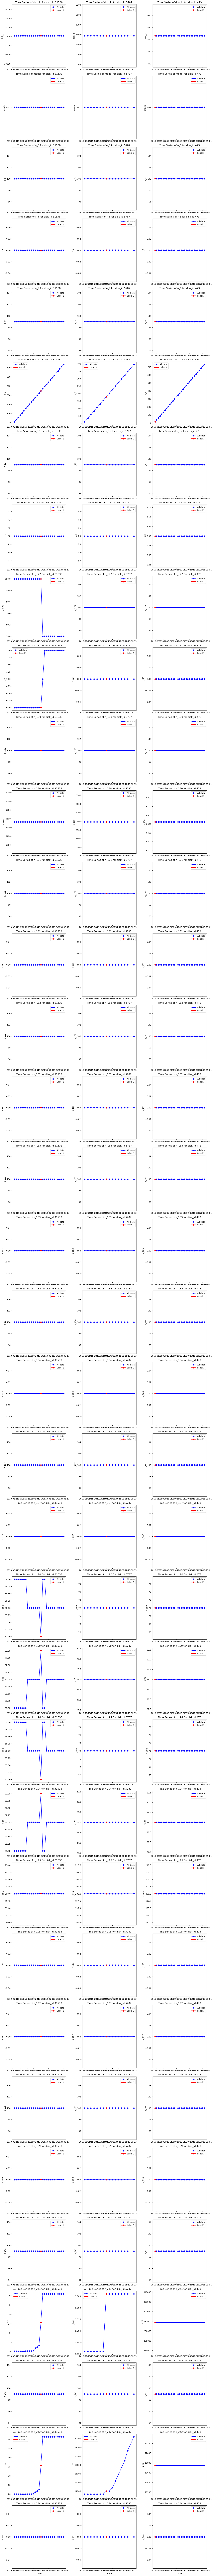

In [17]:
# 차이가 20일 이하인 disk_id 선택
disk_ids = time_diff[time_diff <= 20].index

# 'r_9' 변수가 가장 작은 disk_id 선택
sorted_disk_ids = data[data['disk_id'].isin(disk_ids)].groupby('disk_id')['r_9'].min().sort_values()

# 가장 작은 'r_9' 값을 가진 3개의 disk_id 선택
selected_disk_ids = sorted_disk_ids.head(3).index

# 나머지 코드는 동일하게 실행
features = data.drop(['ds', 'label'], axis=1).columns
fig, axs = plt.subplots(len(features), len(selected_disk_ids), figsize=(15, 5*len(features)))

for i, disk_id in enumerate(selected_disk_ids):
    disk = data[data['disk_id'] == disk_id]
    disk = disk.sort_values('ds')
    disk['ds'] = pd.to_datetime(disk['ds'], format='%Y%m%d')
    disk.set_index('ds', inplace=True)
    disk_label1 = disk[disk['label'] == 1]

    for j, column in enumerate(features):
        axs[j, i].plot(disk.index, disk[column], label='All data', marker='o', color='blue')
        axs[j, i].plot(disk_label1.index, disk_label1[column], color='red', linewidth=3, marker='o', label='Label 1')
        axs[j, i].set_title(f'Time Series of {column} for disk_id {disk_id}')
        axs[j, i].set_ylabel(column)
        axs[j, i].legend()

for ax in axs[-1, :]:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

## healthy VS failed 각 feature별 히스토그램

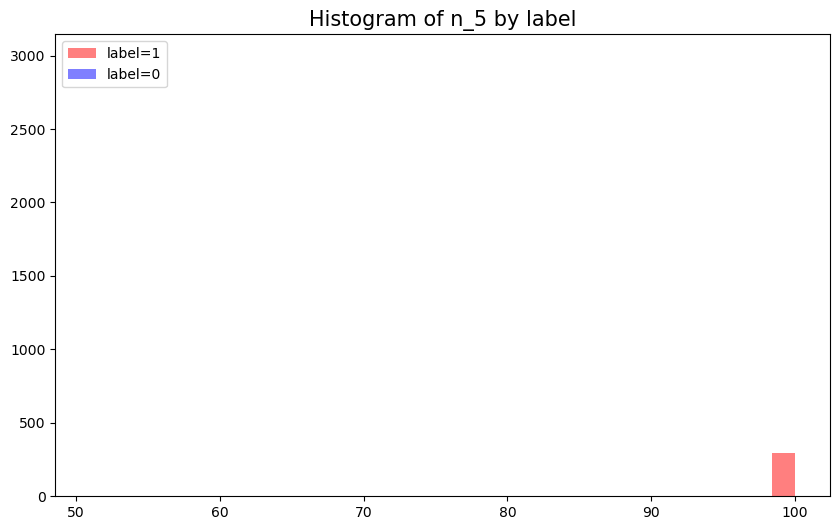

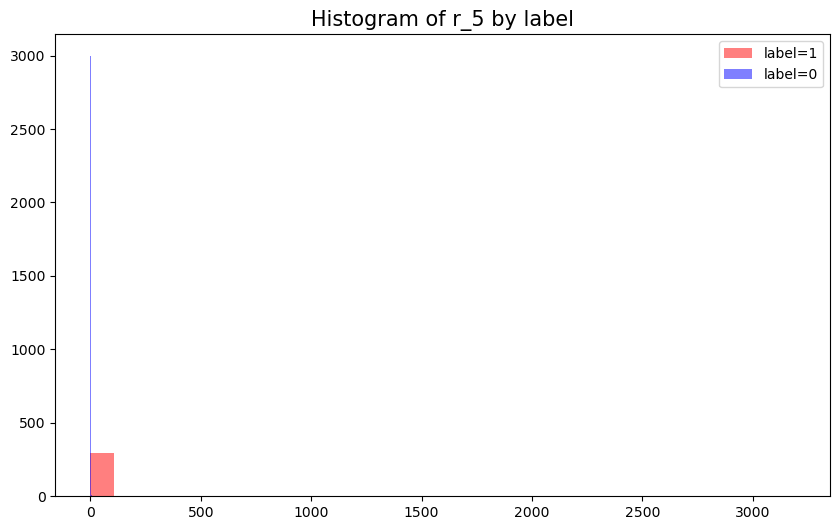

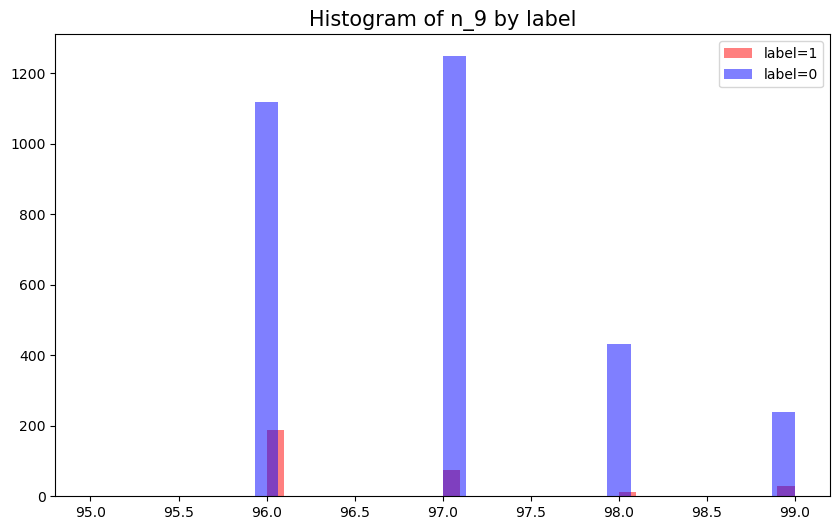

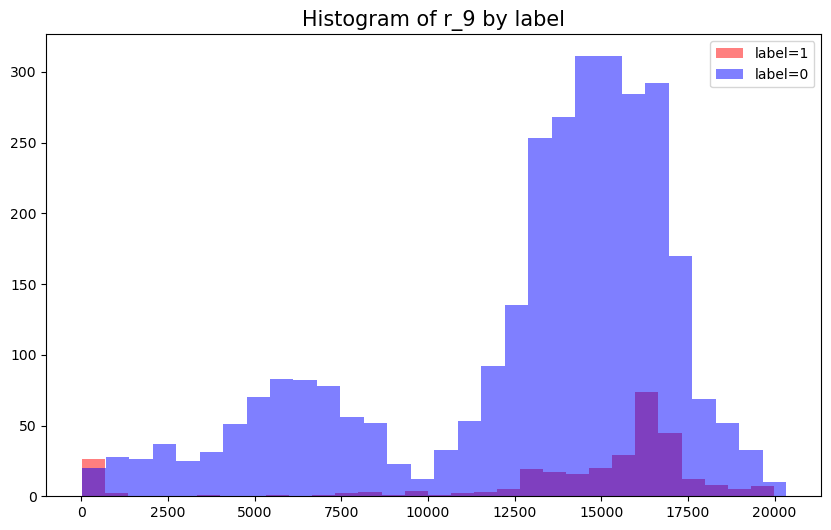

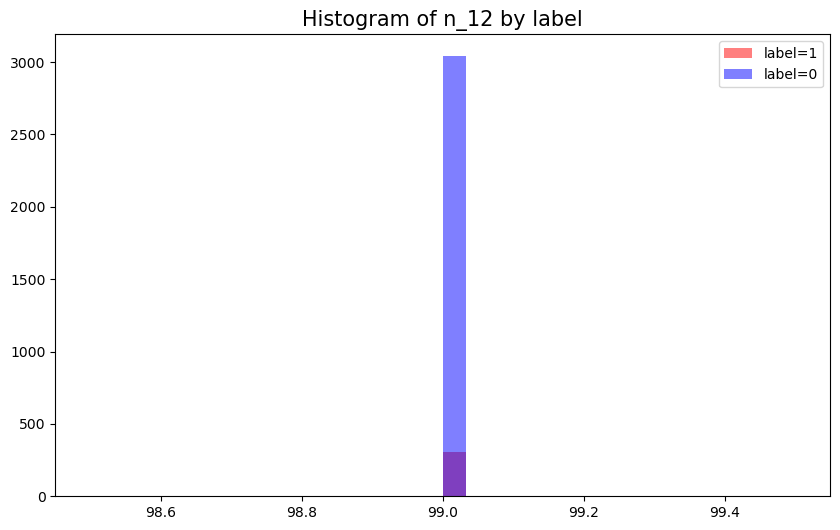

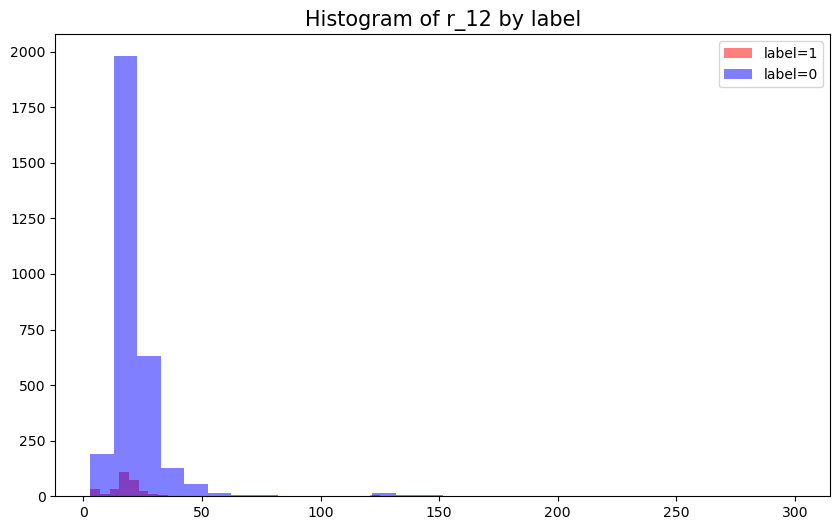

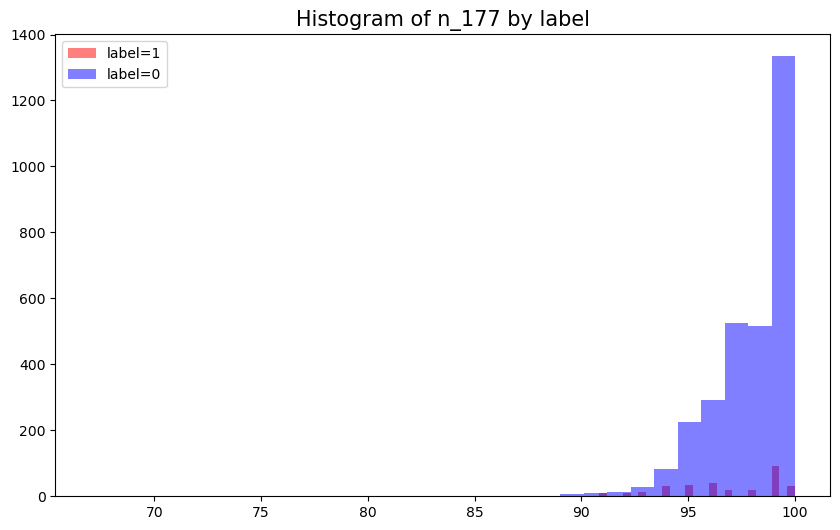

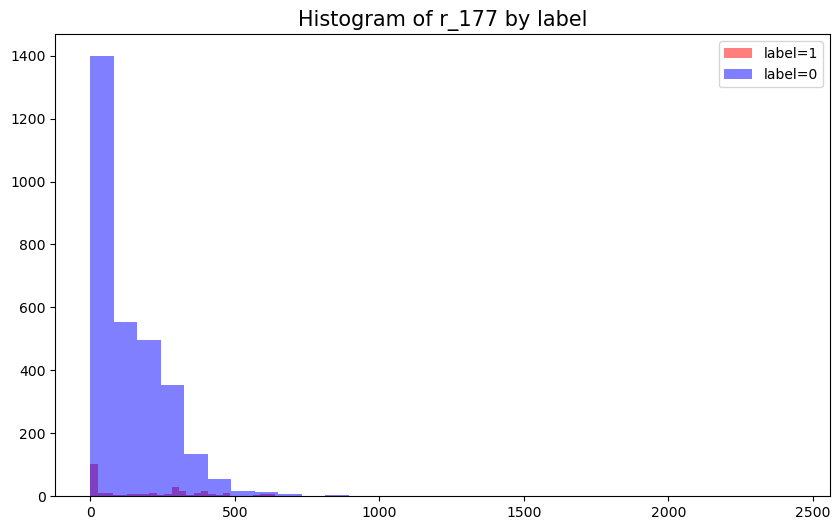

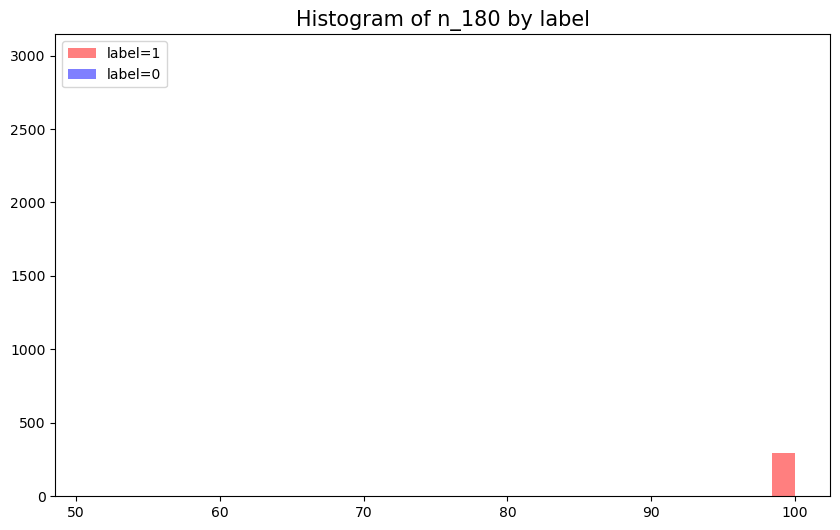

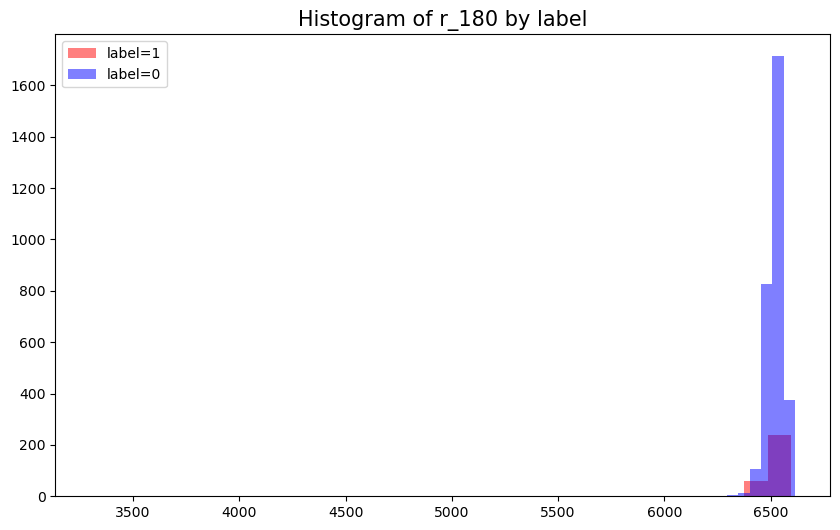

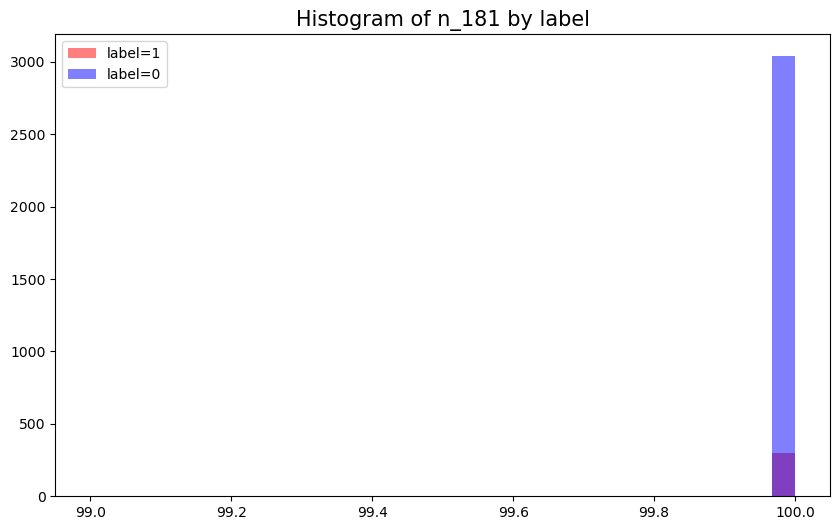

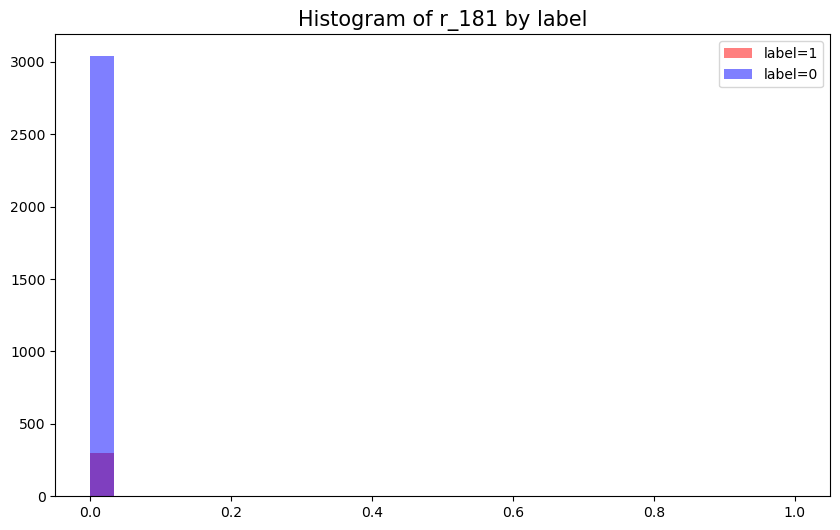

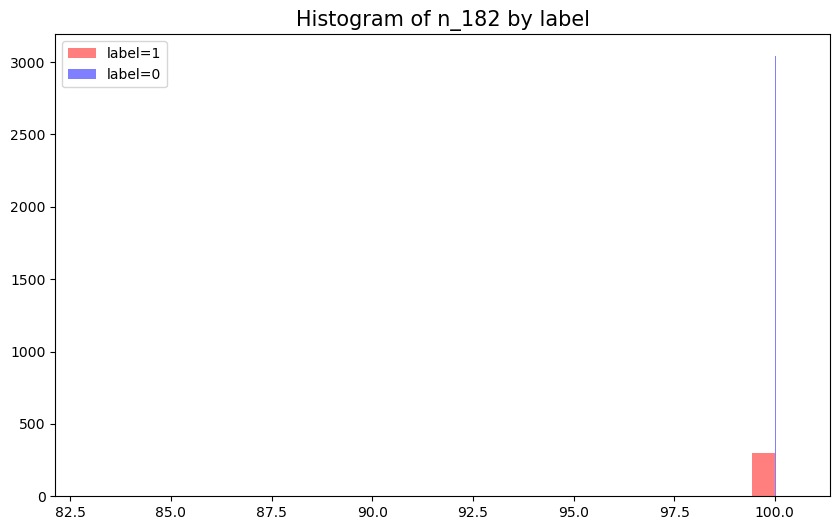

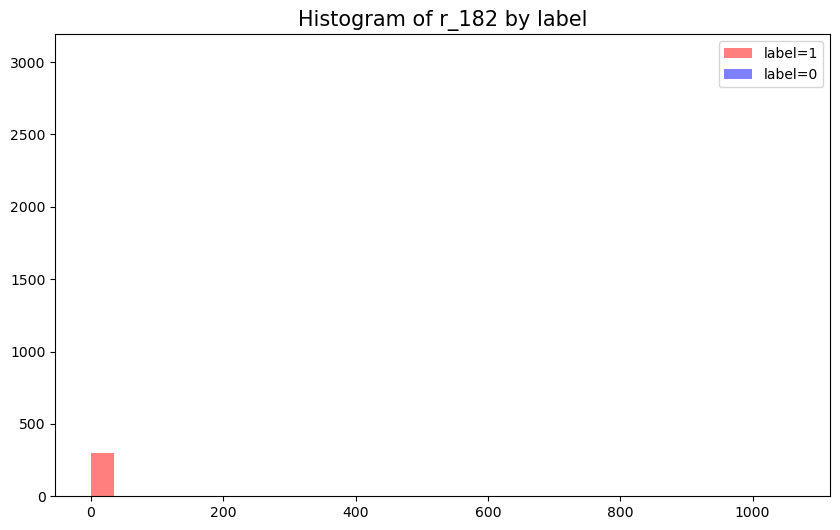

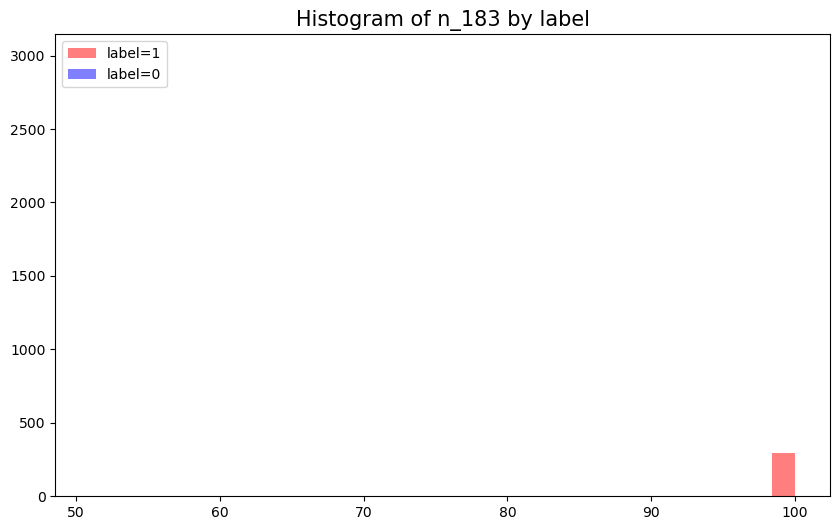

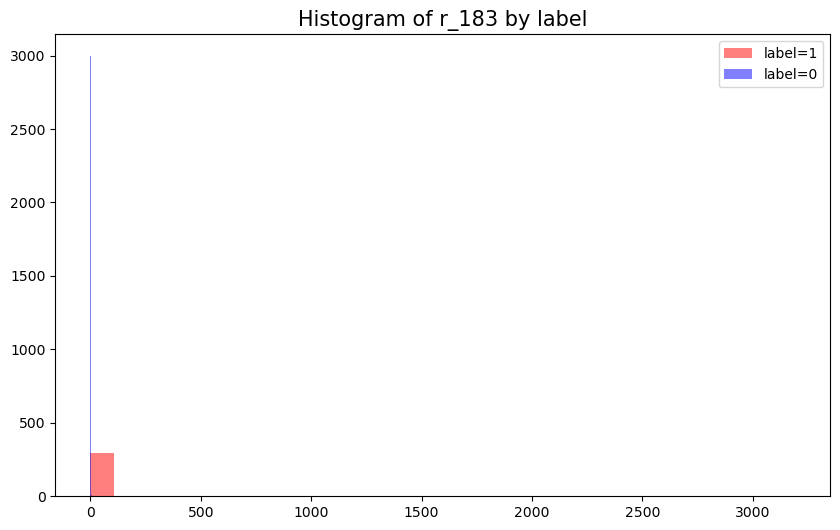

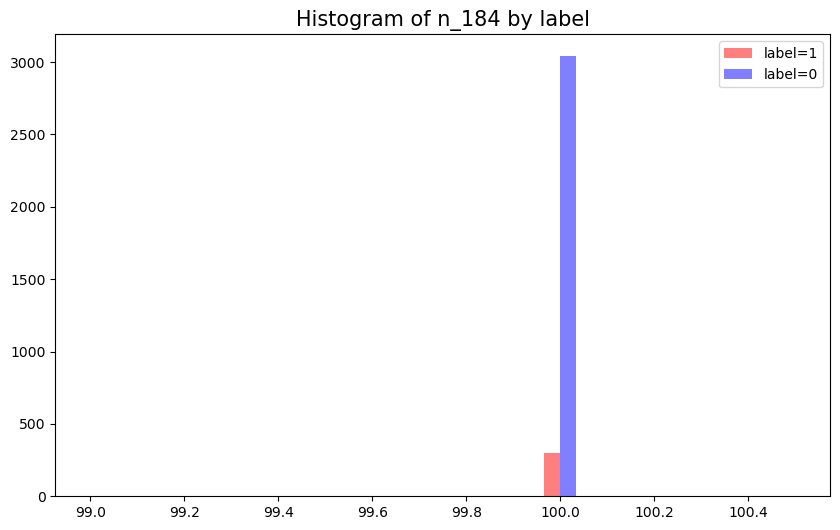

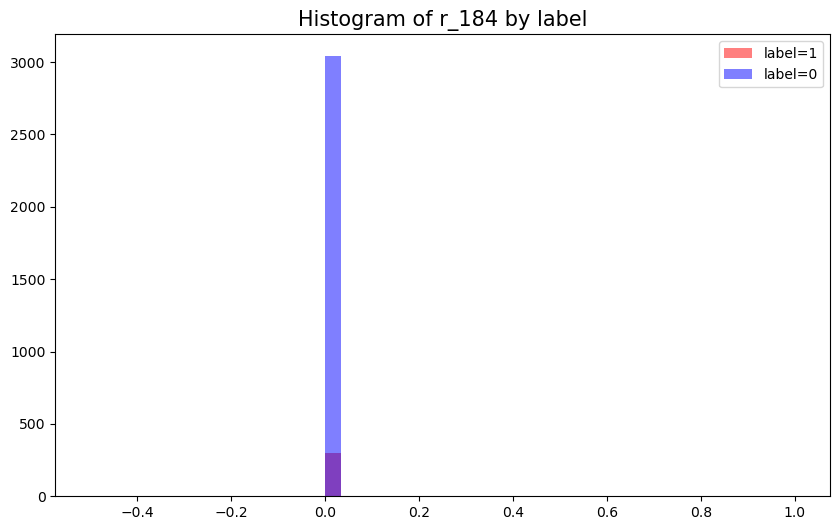

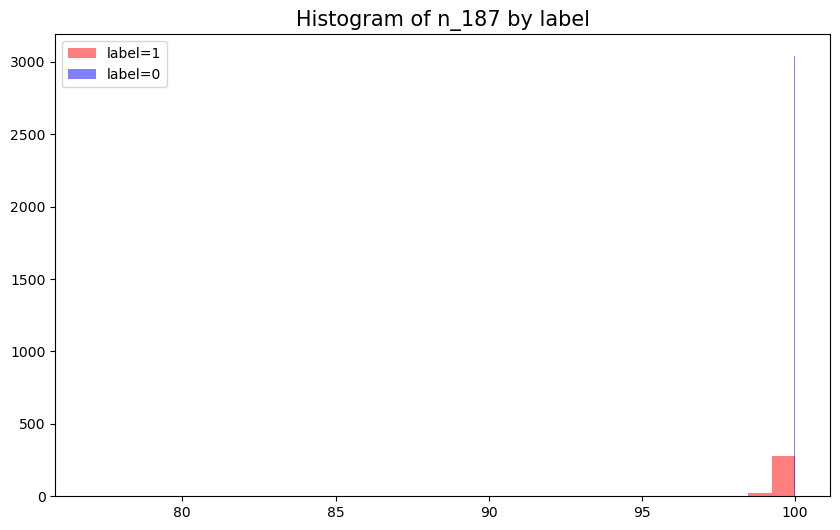

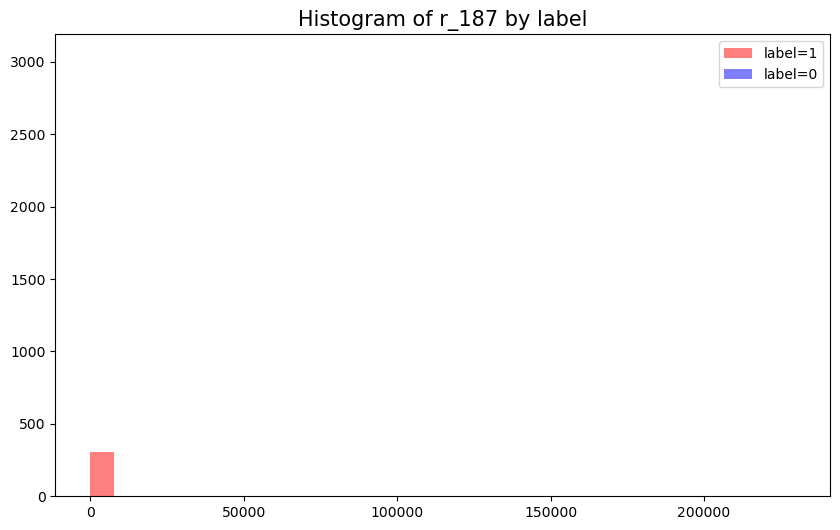

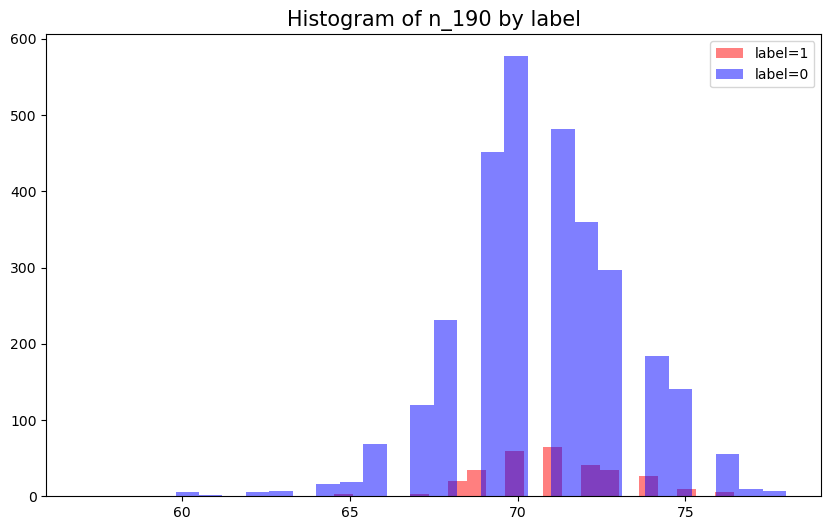

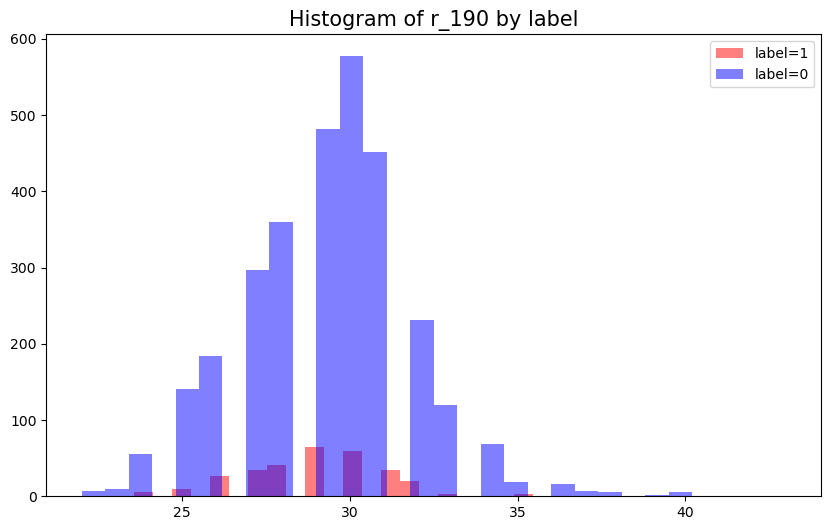

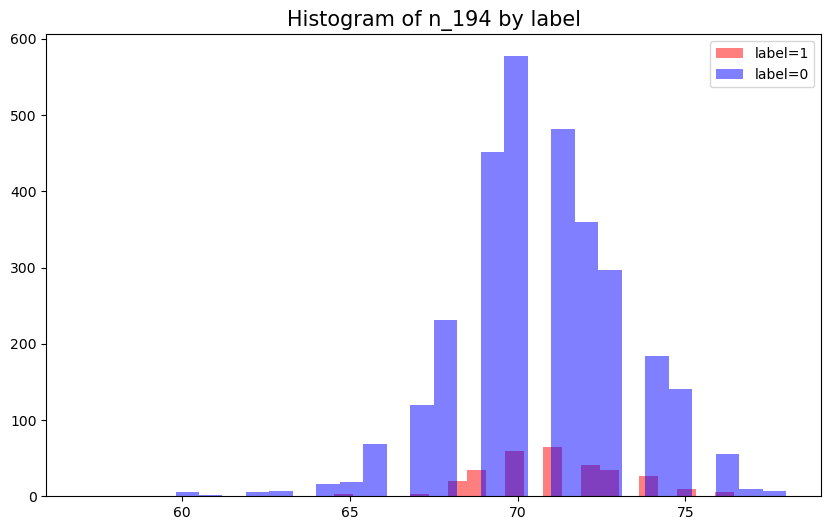

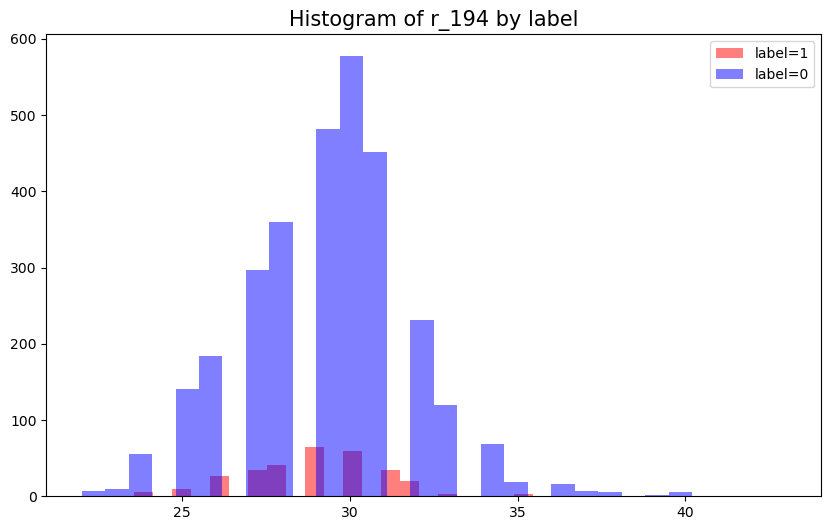

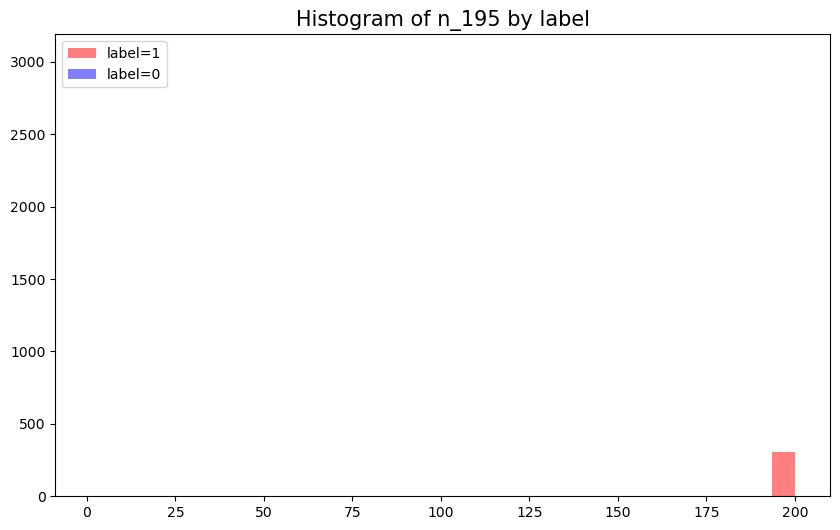

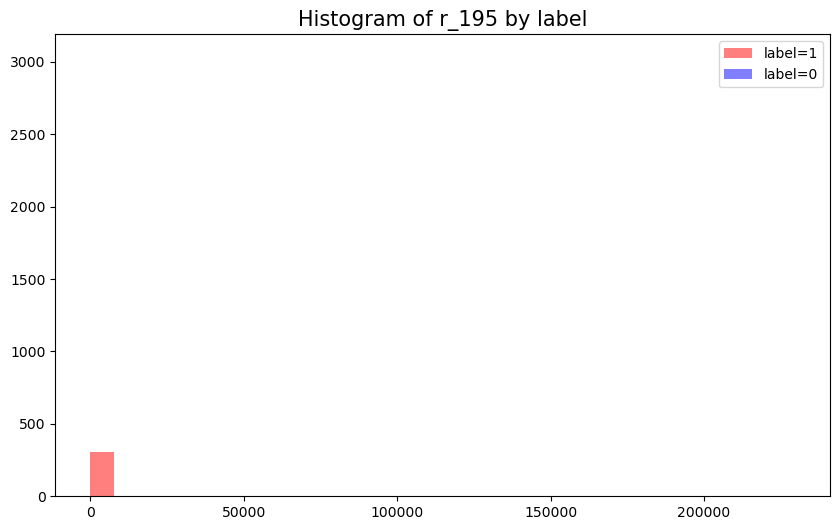

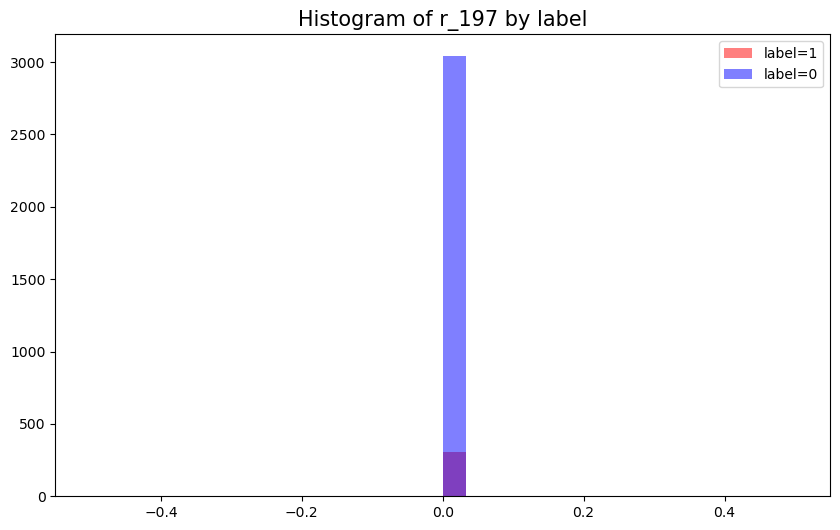

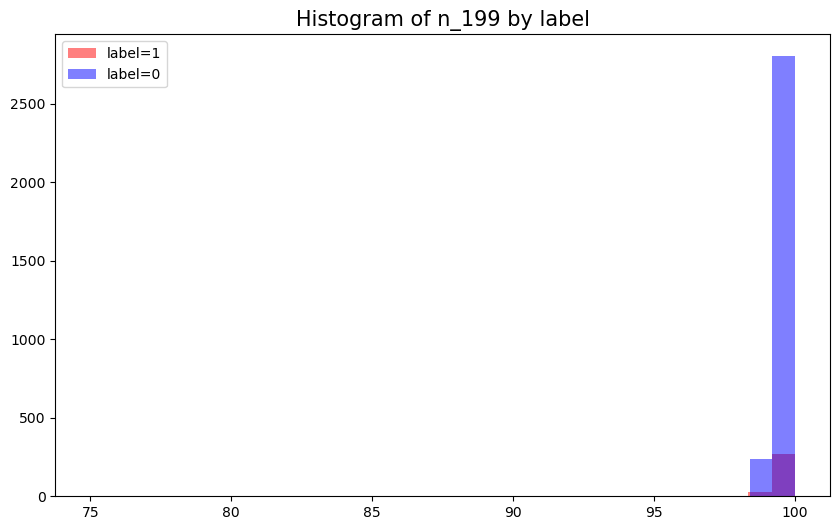

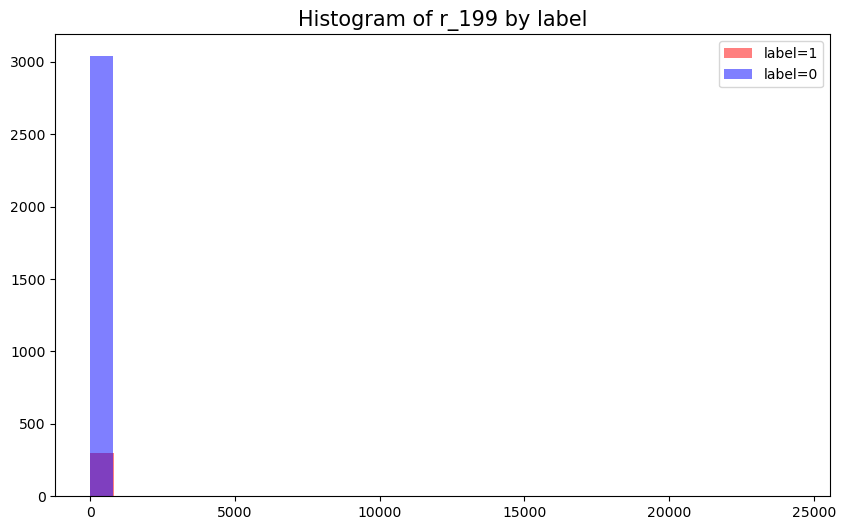

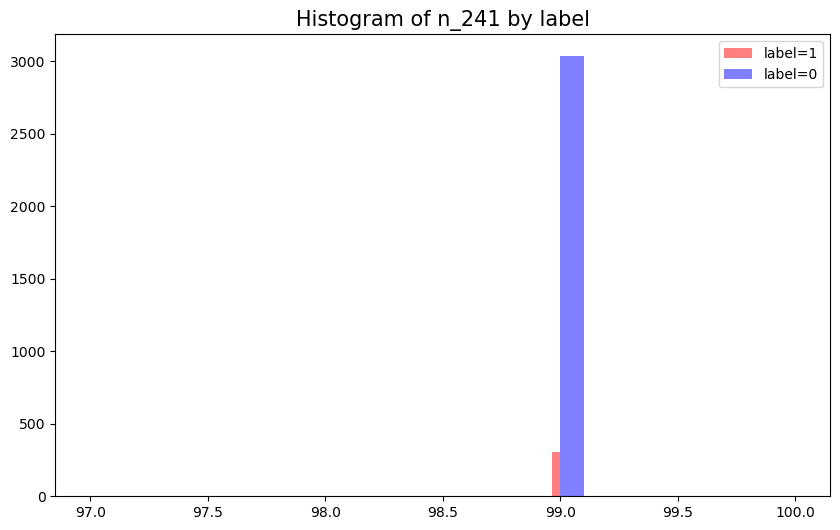

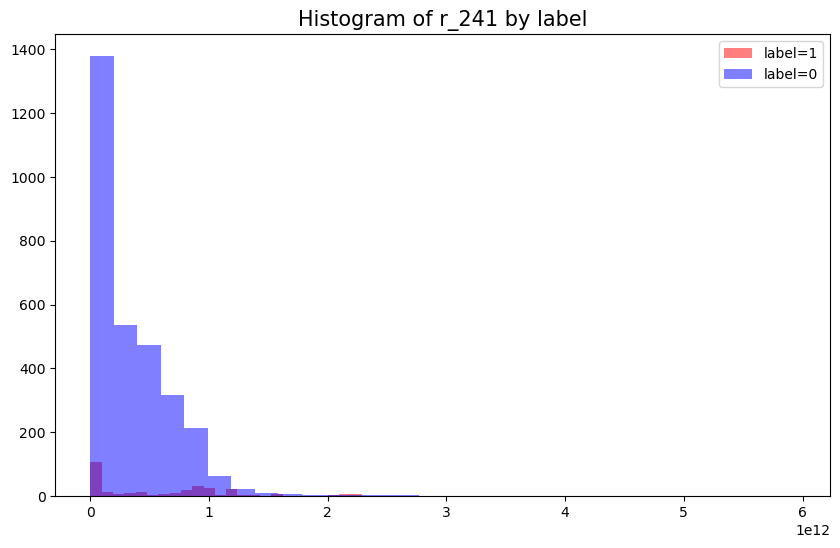

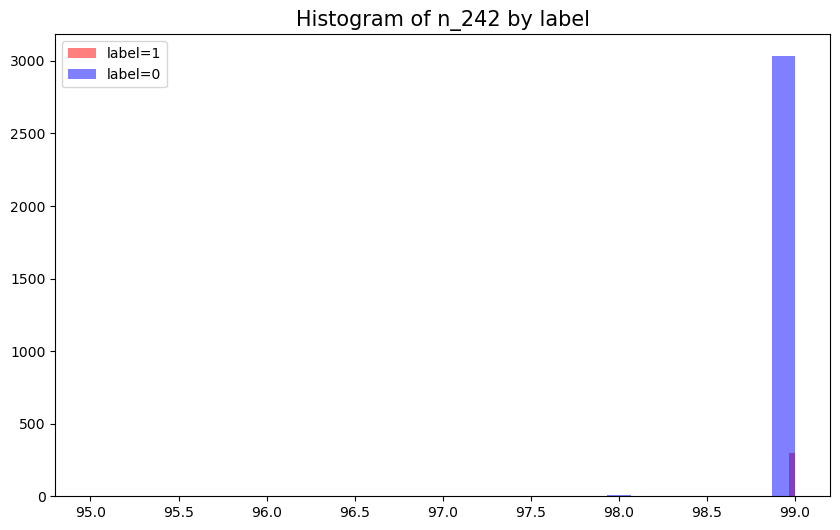

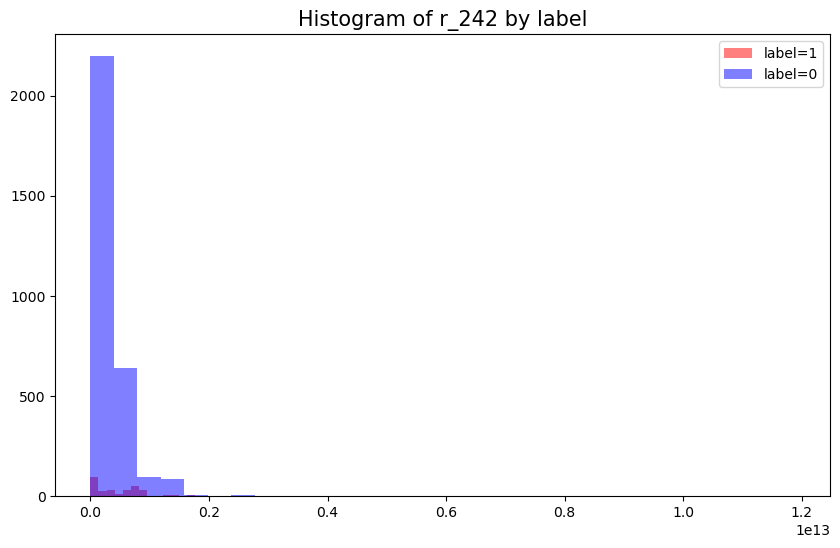

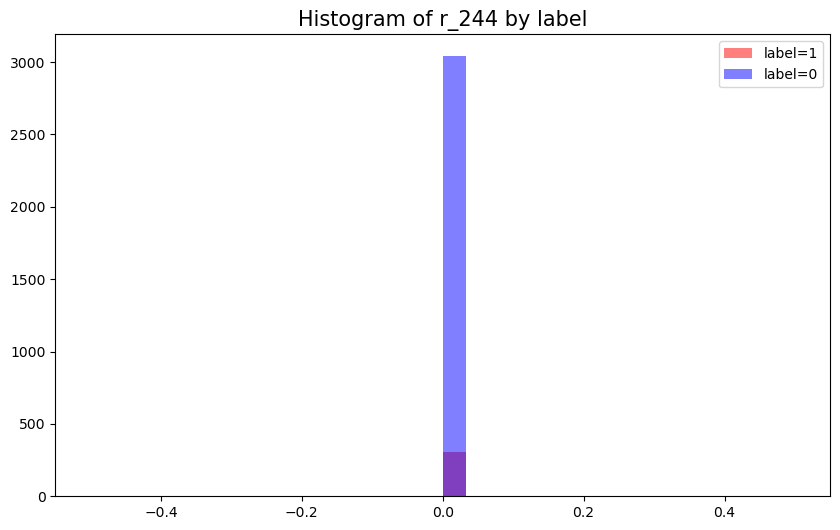

In [18]:
import numpy as np

# 'label' 컬럼을 제외한 피처들만 선택합니다.
features = [col for col in features_data.columns if col != 'label']

# 라벨 0과 1에 대해 같은 수의 샘플을 무작위로 선택합니다.
# 여기서는 라벨 1의 데이터 수를 기준으로 합니다.
n_samples = features_data[features_data['label'] == 1].shape[0]
label0_data = features_data[features_data['label'] == 0].sample(n_samples*10)
label1_data = features_data[features_data['label'] == 1]

for feature in features:
    plt.figure(figsize=(10, 6))
    
    # label=1인 데이터의 히스토그램 그리기 
    plt.hist(label1_data[feature].dropna(), color='r', alpha=0.5, bins=30)
    
    # label=0인 데이터의 히스토그램 그리기 
    plt.hist(label0_data[feature].dropna(), color='b', alpha=0.5, bins=30)
    
    plt.title('Histogram of ' + feature + ' by label', fontsize=15)
    plt.legend(['label=1', 'label=0'])
    plt.show()